
## Ichimocu Strategy - Using Tecnical Analysis Indicators from TA library

In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import hvplot
import hvplot.pandas
from IPython.display import Markdown
from time import sleep # from Tyler Ryan 
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 2000)
pd.set_option("display.max_columns", 2000)
pd.set_option("display.width", 1000)

In [2]:
#here is the Technical analysis library for Python
# pip install --upgrade ta

## Fetch Data

In [3]:
# TA adding all features
import ta
from ta import add_all_ta_features
from ta.utils import dropna

In [4]:
stock = 'tsla'

df = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = stock,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "60d",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "5m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = False,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

Open        High         Low       Close   Volume
Datetime                                                                          
2021-03-17 09:30:00-04:00  656.869995  663.809998  651.591614  654.909973  2427443
2021-03-17 09:35:00-04:00  656.000000  659.351501  651.010010  653.440002   928847
2021-03-17 09:40:00-04:00  654.000000  661.789917  653.101624  661.349976   848028
2021-03-17 09:45:00-04:00  660.000000  665.549988  659.250000  665.219971   754348
2021-03-17 09:50:00-04:00  664.500000  668.889893  664.500000  668.130005   676197

In [6]:
#If Data is in CSV file, Load data
#df = pd.read_csv('AAPL.CSV', sep=',')
#df = ta.utils.dropna(df)


# Add all ta features
df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume")


C:\Users\raque\anaconda3\envs\mlenv\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\raque\anaconda3\envs\mlenv\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [7]:
df.shape

(4681, 88)

In [8]:

#df = ta.utils.dropna(df)
df.tail(3)


Open        High         Low       Close  Volume    volume_adi  volume_obv  volume_cmf     volume_fi  volume_mfi   volume_em  volume_sma_em  volume_vpt  volume_nvi  volume_vwap  volatility_atr  volatility_bbm  volatility_bbh  volatility_bbl  volatility_bbw  volatility_bbp  volatility_bbhi  volatility_bbli  volatility_kcc  volatility_kch  volatility_kcl  volatility_kcw  volatility_kcp  volatility_kchi  volatility_kcli  volatility_dcl  volatility_dch  volatility_dcm  volatility_dcw  volatility_dcp  volatility_ui  trend_macd  trend_macd_signal  trend_macd_diff  trend_sma_fast  trend_sma_slow  trend_ema_fast  trend_ema_slow  trend_adx  trend_adx_pos  trend_adx_neg  trend_vortex_ind_pos  trend_vortex_ind_neg  trend_vortex_ind_diff  trend_trix  trend_mass_index  trend_cci  trend_dpo  trend_kst  trend_kst_sig  trend_kst_diff  trend_ichimoku_conv  trend_ichimoku_base  trend_ichimoku_a  trend_ichimoku_b  trend_visual_ichimoku_a  trend_visual_ichimoku_b  \
Datetime                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
2021-06-10 15:50:00-04:00  608.900024  610.289978  608.900024  610.015015  238017 -5.347790e+06    67108220   -0.032848   5152.390356   28.466802  277.408281    -196.667910  403.864892  630.290871   609.969042        1.547218      610.697897      613.776117      607.619678        1.008099        0.389078              0.0              0.0      609.305809      610.846238      607.765379        0.505634        0.730198              0.0              0.0      607.799988      613.679871      610.739929        0.962814        0.376713       0.636225   -0.819417          -0.638463        -0.180953      609.637085      611.559000      609.865105      610.684521  25.140441      11.417066      18.244205              0.844983              1.114399              -0.269415   -0.015900         24.080812 -46.139566   1.632181  -4.788587      -2.460361       -2.328226           609.100006           612.195007        610.647507        611.410004               612.320236               607.410004   
2021-06-10 15:55:00-04:00  610.015930  610.299988  609.500000  610.119995  411051 -5.121707e+06    67519271    0.048393  10580.952685   39.874288   59.357700    -172.473276  600.629910  630.290871   609.866904        1.472495      610.575397      613.538714      607.612080        0.970664        0.423160              0.0              0.0      609.299809      610.799241      607.800376        0.492182        0.773499              0.0              0.0      607.799988      613.369995      610.584991        0.912255        0.416518       0.632930   -0.738386          -0.658448        -0.079938      609.452911      611.388616      609.904319      610.642705  24.974361      11.036129      17.560552              0.888364              1.089671              -0.201307   -0.016713         24.051700 -30.611706  -1.005389  -5.034939      -3.047032       -1.987907           609.049988           612.195007        610.622498        611.410004               612.320236               608.364990   
2021-06-10 16:00:00-04:00  610.119995  610.119995  610.11

In [9]:
df[['Close', 'trend_ichimoku_conv', 'trend_ichimoku_base',
       'trend_ichimoku_a', 'trend_ichimoku_b', 'trend_visual_ichimoku_a', 'trend_visual_ichimoku_b']].tail(10)

Close  trend_ichimoku_conv  trend_ichimoku_base  trend_ichimoku_a  trend_ichimoku_b  trend_visual_ichimoku_a  trend_visual_ichimoku_b
Datetime                                                                                                                                                             
2021-06-10 15:15:00-04:00  609.500000           610.829987           612.440002        611.634995        611.410004               611.119965               606.620056
2021-06-10 15:20:00-04:00  609.729980           610.815002           612.425018        611.620010        611.410004               611.199936               606.620056
2021-06-10 15:25:00-04:00  608.909973           610.584991           612.195007        611.389999        611.410004               611.424957               606.620056
2021-06-10 15:30:00-04:00  608.669983           610.584991           612.195007        611.389999        611.410004               611.792511               606.664978
2021-06-10 15:35:00-04:00  609.500000           610.475006           612.195007        611.335007        611.410004               612.197479               606.974976
2021-06-10 15:40:00-04:00  609.090027           610.179993           612.195007        611.187500        611.410004               612.320236               607.060028
2021-06-10 15:45:00-04:00  608.659973           609.134979           612.195007        610.664993        611.410004               612.320236               607.160004
2021-06-10 15:50:00-04:00  610.015015           609.100006           612.195007        610.647507        611.410004               612.320236               607.410004
2021-06-10 15:55:00-04:00  610.119995           609.049988           612.195007        610.622498        611.410004               612.320236               608.364990
2021-06-10 16:00:00-04:00  610.119995           609.049988           612.195007        610.622498        611.410004               612.320236               610.824982

In [10]:
import matplotlib as mpl
mpl.style.use('seaborn')

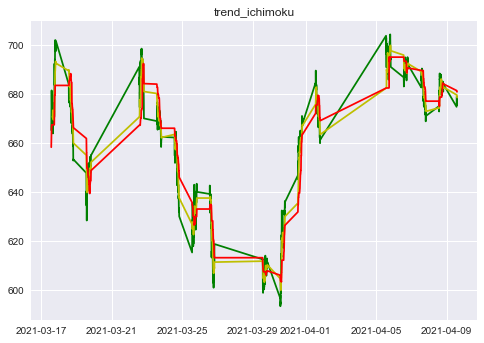

In [11]:
plt.plot(df[3:1257].Close, 'g')
#plt.plot(df[3:1257].trend_ichimoku_conv, label='trend_ichimoku_conv')
#plt.plot(df[3:1257].trend_ichimoku_base, label='trend_ichimoku_base')
plt.plot(df[3:1257].trend_ichimoku_a,'y', label='trend_ichimoku_a')
plt.plot(df[3:1257].trend_ichimoku_b,'r', label='trend_ichimoku_b')
#plt.plot(df[3:1257].trend_visual_ichimoku_a,'r', label='trend_visual_ichimoku_a')
#plt.plot(df[3:1257].trend_visual_ichimoku_b, label='trend_visual_ichimoku_b')
plt.title('trend_ichimoku')
plt.rcParams['figure.figsize'] = [20,12]
plt.show()

# Benchmarck

### Holding Stock Position

<AxesSubplot:xlabel='Datetime'>

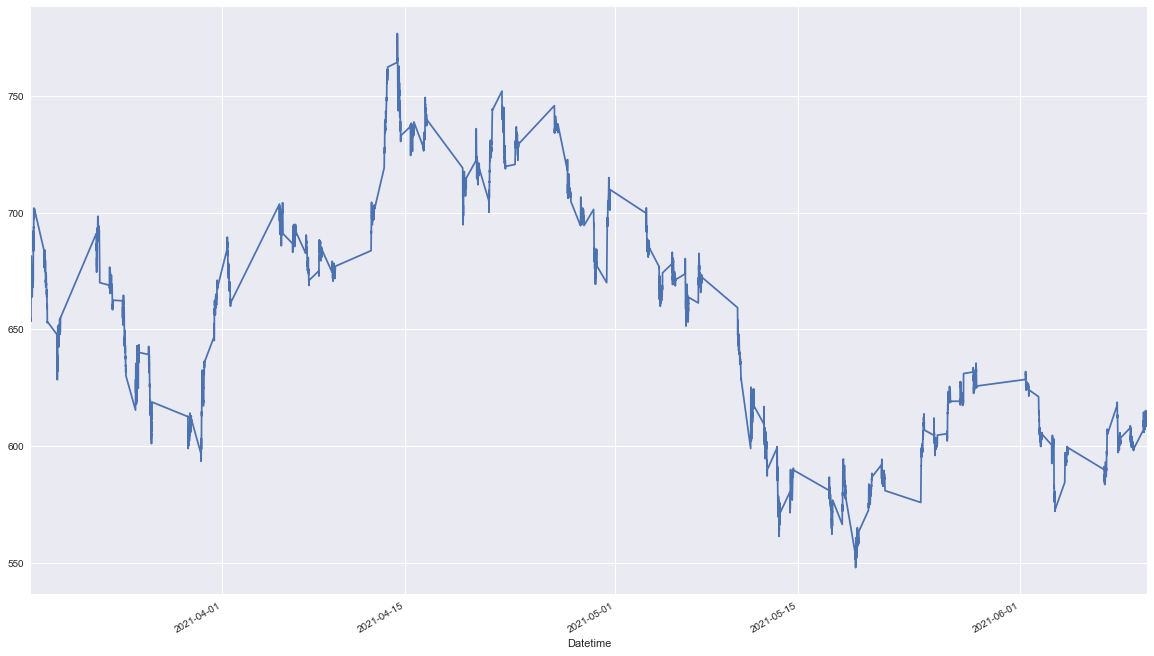

In [12]:
df['Close'].plot()

In [13]:
df['Close'].head(1)

Datetime
2021-03-17 09:30:00-04:00    654.909973
Name: Close, dtype: float64

In [14]:
df['Close'].tail(1)

Datetime
2021-06-10 16:00:00-04:00    610.119995
Name: Close, dtype: float64

In [15]:
df['Stock_Daily_Return']= df['Close'].pct_change()
df[['Close', 'Stock_Daily_Return']].head()

Close  Stock_Daily_Return
Datetime                                                 
2021-03-17 09:30:00-04:00  654.909973                 NaN
2021-03-17 09:35:00-04:00  653.440002           -0.002245
2021-03-17 09:40:00-04:00  661.349976            0.012105
2021-03-17 09:45:00-04:00  665.219971            0.005852
2021-03-17 09:50:00-04:00  668.130005            0.004375

In [16]:
df['Stock_Cum_Return'] =  (1 + df['Stock_Daily_Return']).cumprod() -1
df[['Close', 'Stock_Daily_Return','Stock_Cum_Return']].tail()

Close  Stock_Daily_Return  Stock_Cum_Return
Datetime                                                                   
2021-06-10 15:40:00-04:00  609.090027           -0.000673         -0.069964
2021-06-10 15:45:00-04:00  608.659973           -0.000706         -0.070620
2021-06-10 15:50:00-04:00  610.015015            0.002226         -0.068551
2021-06-10 15:55:00-04:00  610.119995            0.000172         -0.068391
2021-06-10 16:00:00-04:00  610.119995            0.000000         -0.068391

In [17]:
# Benchmarck to compare if the startegy is better than buying stock on first day close and hold it up to last day of frame time.
Holding_stock = df['Stock_Cum_Return'].tail(1)

Holding_stock_gain_loss = Holding_stock * 100

Holding_stock_gain_loss

print(f'The Cummulative Return gained by holding the Stock is {Holding_stock_gain_loss}')

The Cummulative Return gained by holding the Stock is Datetime
2021-06-10 16:00:00-04:00   -6.839105
Name: Stock_Cum_Return, dtype: float64


In [18]:
holding_cum_return = df[['Stock_Cum_Return']]
holding_cum_ret_chart = holding_cum_return.hvplot.line(
    ylabel='Stock_Cum_Return',
    width=700,
    height=400,
    title=f'{stock.upper()}, Holding Stock Cumulative Return (60d/5m)')

holding_cum_ret_chart

:Curve   [Datetime]   (Stock_Cum_Return)

### Prepare Portfolio Evaluation Metrics DataFrame

In [19]:
# Prepare DataFrame for metrics
metrics = [
    'Annual Return',
    'Cumulative Returns',
    'Annual Volatility',
    'Sharpe Ratio',
    'Sortino Ratio']

columns = ['Backtest']

# Initialize the DataFrame with index set to evaluation metrics and column as `Backtest` (just like PyFolio)
Stock_evaluation_df = pd.DataFrame(index=metrics, columns=columns)
#portfolio_evaluation_df

### Calculate and Assign Portfolio Evaluation Metrics

In [20]:
# Calculate cumulative return
Stock_evaluation_df.loc['Cumulative Returns'] = df['Stock_Cum_Return'][-1]

time_conversion = 252 * 24 * 12
# Calculate annualized return
Stock_evaluation_df.loc['Annual Return'] = (
    df['Stock_Daily_Return'].mean() * time_conversion)

# Calculate annual volatility
Stock_evaluation_df.loc['Annual Volatility'] = (
    df['Stock_Daily_Return'].std() * np.sqrt(time_conversion))

# Calculate Sharpe Ratio
Stock_evaluation_df.loc['Sharpe Ratio'] = (
    df['Stock_Daily_Return'].mean() * time_conversion) / (
    df['Stock_Daily_Return'].std() * np.sqrt(time_conversion))

# Calculate Downside Return
sortino_ratio_df = df[['Stock_Daily_Return']].copy()
sortino_ratio_df.loc[:,'Downside Returns'] = 0

target = 0
mask = sortino_ratio_df['Stock_Daily_Return'] < target
sortino_ratio_df.loc[mask, 'Downside Returns'] = sortino_ratio_df['Stock_Daily_Return']**2
Stock_evaluation_df

# Calculate Sortino Ratio
down_stdev = np.sqrt(sortino_ratio_df['Downside Returns'].mean()) * np.sqrt(time_conversion)
expected_return = sortino_ratio_df['Stock_Daily_Return'].mean() * time_conversion
sortino_ratio = expected_return/down_stdev

# Stock_evaluation_df.loc['Sortino Ratio_Long'] = 

Stock_evaluation_df.loc['Sortino Ratio'] = sortino_ratio

Stock_evaluation_df.head()

Backtest
Annual Return      -0.601079
Cumulative Returns -0.068391
Annual Volatility   0.998662
Sharpe Ratio       -0.601885
Sortino Ratio      -0.872847

In [21]:
Stock_evaluation_df.reset_index(inplace=True)
Stock_metrics_evaluation_table = Stock_evaluation_df.hvplot.table(
    title = f'{stock.upper()}, Holding Stock Evaluation Metrics (60d/5m)',
    width = 500,
    height = 200)

Stock_metrics_evaluation_table

:Table   [index,Backtest]

In [22]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_mfi', 'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volume_vwap', 'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp', 'volatility_bbhi', 'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp', 'volatility_kchi', 'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp', 'volatility_ui', 'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx', 'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix', 'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst', 'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv', 'trend_ichimoku_base', 'trend_ichimoku_a',
       '

In [23]:
# Grab just the `date` and `close` from the IEX dataset
signals_df = df.loc[:, ['Date', 'Close','trend_ichimoku_a', 'trend_ichimoku_b']].copy()

# Set the `date` column as the index
#signals_df = signals_df.set_index("Date", drop=True)

signals_df['trend_ichimoku'] = 0.0

# Generate the trading signal 0 or 1,
# where 0 is when the trend_ichimoku_a is under the trend_ichimoku_b, and
# where 1 is when the trend_ichimoku_a is higher (or crosses over) the trend_ichimoku_b

signals_df['trend_ichimoku'] = np.where(
    signals_df['trend_ichimoku_a'] > signals_df['trend_ichimoku_b'], 1.0, 0.0)


# Calculate the points in time at which a position should be taken, 1 or -1
signals_df['Signal'] = signals_df['trend_ichimoku'].diff()

# Print the DataFrame
signals_df.tail()

C:\Users\raque\anaconda3\envs\mlenv\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Date       Close  trend_ichimoku_a  trend_ichimoku_b  trend_ichimoku  Signal
Datetime                                                                                               
2021-06-10 15:40:00-04:00   NaN  609.090027        611.187500        611.410004             0.0     0.0
2021-06-10 15:45:00-04:00   NaN  608.659973        610.664993        611.410004             0.0     0.0
2021-06-10 15:50:00-04:00   NaN  610.015015        610.647507        611.410004             0.0     0.0
2021-06-10 15:55:00-04:00   NaN  610.119995        610.622498        611.410004             0.0     0.0
2021-06-10 16:00:00-04:00   NaN  610.119995        610.622498        611.410004             0.0     0.0

# Visualization

In [24]:
# Visualize exit position relative to close price
Sell = signals_df[signals_df['Signal'] == -1.0]['Close'].hvplot.scatter(
    color='red',
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400,
    title=f'{stock.upper()}, Ichimoku Cloud (60d/5m)')

# Visualize entry position relative to close price
Buy = signals_df[signals_df['Signal'] == 1.0]['Close'].hvplot.scatter(
    color='green',
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400,
    title=f'{stock.upper()}, Ichimoku Cloud (60d/5m)')

# Visualize close price for the investment
Close_Price = signals_df[['Close']].hvplot(
    line_color='lightblue',
    legend=True,
    ylabel='Price in $',
    width=1000,
    height=400,
    title=f'{stock.upper()}, Ichimoku Cloud (60d/5m)')

# Visualize trend_ichimoku
trend_ichimoku = signals_df[['trend_ichimoku_a','trend_ichimoku_b']].hvplot(
    ylabel='Price in $',
    legend=True,
    width=1000,
    height=400,
    title=f'{stock.upper()}, Ichimoku Cloud (60d/5m)')

# Overlay plots (.opts(xaxis=None))
entry_exit_plot = Close_Price * trend_ichimoku * Buy * Sell
entry_exit_plot

:Overlay
   .Curve.I          :Curve   [Datetime]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Datetime]   (value)
   .Scatter.Close.I  :Scatter   [Datetime]   (Close)
   .Scatter.Close.II :Scatter   [Datetime]   (Close)

# Backtesting

In [25]:
# Set initial capital
initial_capital = float(100000)

# Set the share size
share_size = 500

# Take a 500 share position where the dual moving average crossover is 1 (SMA50 is greater than SMA200)
signals_df['Position'] = share_size * signals_df['Signal']

# Find the points in time where a 500 share position is bought or sold
# signals_df['Buy/Sell Position'] = signals_df['Position'].diff
signals_df['Buy/Sell Position'] = signals_df['Position']

# Multiply share price by entry/exit positions and get the cumulatively sum
signals_df['Portfolio Holdings'] = signals_df['Close'] * signals_df['Position'].cumsum()

# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
signals_df['Portfolio Cash'] = initial_capital - (signals_df['Close'] * signals_df['Position']).cumsum()

# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
signals_df['Portfolio Total'] = signals_df['Portfolio Cash'] + signals_df['Portfolio Holdings']

# Calculate the portfolio daily returns
signals_df['Portfolio Daily Returns'] = signals_df['Portfolio Total'].pct_change()

# Calculate the cumulative returns
signals_df['Portfolio Cumulative Returns'] = (1 + signals_df['Portfolio Daily Returns']).cumprod() - 1

signals_df.dropna()

# Print the DataFrame
signals_df[signals_df['Buy/Sell Position'] != 0].tail()


Date       Close  trend_ichimoku_a  trend_ichimoku_b  trend_ichimoku  Signal  Position  Buy/Sell Position  Portfolio Holdings  Portfolio Cash  Portfolio Total  Portfolio Daily Returns  Portfolio Cumulative Returns
Datetime                                                                                                                                                                                                                                        
2021-06-09 10:35:00-04:00   NaN  604.789978        604.492477        604.559937             0.0    -1.0    -500.0             -500.0            0.000000   147264.923096    147264.923096                -0.001051                      0.472649
2021-06-09 10:40:00-04:00   NaN  606.205017        604.644989        604.559937             1.0     1.0     500.0              500.0       303102.508545  -155837.585449    147264.923096                 0.000000                      0.472649
2021-06-09 11:35:00-04:00   NaN  602.711487        605.349976        605.529938             0.0    -1.0    -500.0             -500.0            0.000000   145518.157959    145518.157959                -0.000647                      0.455182
2021-06-10 09:45:00-04:00   NaN  610.895020        604.929230        604.906769             1.0     1.0     500.0              500.0       305447.509766  -159929.351807    145518.157959                 0.000000                      0.455182
2021-06-10 15:25:00-04:00   NaN  608.909973        611.389999        611.410004             0.0    -1.0    -500.0             -500.0            0.000000   144525.634766    144525.634766                -0.002829                      0.445256

### Plot Entry/Exit Points of Trading Strategy vs. Backtest Results

In [26]:
# Visualize entry position relative to total portfolio value
BUY = signals_df[signals_df['Signal'] == 1.0]['Portfolio Cumulative Returns'].hvplot.scatter(
    color='green',
    legend=True,
    ylabel='Portfolio Cumulative Returns',
    width=1000,
    height=400,
    title =f'{stock.upper()}, Portfolio Cumulative Returns'
)

# Visualize exit position relative to total portfolio value
SELL = signals_df[signals_df['Signal'] == -1.0]['Portfolio Cumulative Returns'].hvplot.scatter(
    color='red',
    legend=True,
    ylabel='Portfolio Cumulative Returns',
    xlabel='Date',
    width=1000,
    height=400,
    title =f'{stock.upper()}, Portfolio Cumulative Returns'
)

# Visualize total portoflio value for the investment
total_portfolio_value = signals_df[['Portfolio Cumulative Returns']].hvplot(
    line_color='lightblue',
    ylabel='Portfolio Cumulative Returns',
    xlabel='Date',
    width=1000,
    height=400,
    title =f'{stock.upper()}, Portfolio Cumulative Returns'
)

# Overlay plots
portfolio_buy_sell_plot = total_portfolio_value * BUY * SELL
portfolio_buy_sell_plot

:Overlay
   .Curve.I                                 :Curve   [Datetime]   (Portfolio Cumulative Returns)
   .Scatter.Portfolio_Cumulative_Returns.I  :Scatter   [Datetime]   (Portfolio Cumulative Returns)
   .Scatter.Portfolio_Cumulative_Returns.II :Scatter   [Datetime]   (Portfolio Cumulative Returns)

In [27]:
# Comparing the Different Portfolio Cumulative Returns

signals_df['Portfolio Cumulative Returns'].tail(5)


Datetime
2021-06-10 15:40:00-04:00    0.445256
2021-06-10 15:45:00-04:00    0.445256
2021-06-10 15:50:00-04:00    0.445256
2021-06-10 15:55:00-04:00    0.445256
2021-06-10 16:00:00-04:00    0.445256
Name: Portfolio Cumulative Returns, dtype: float64

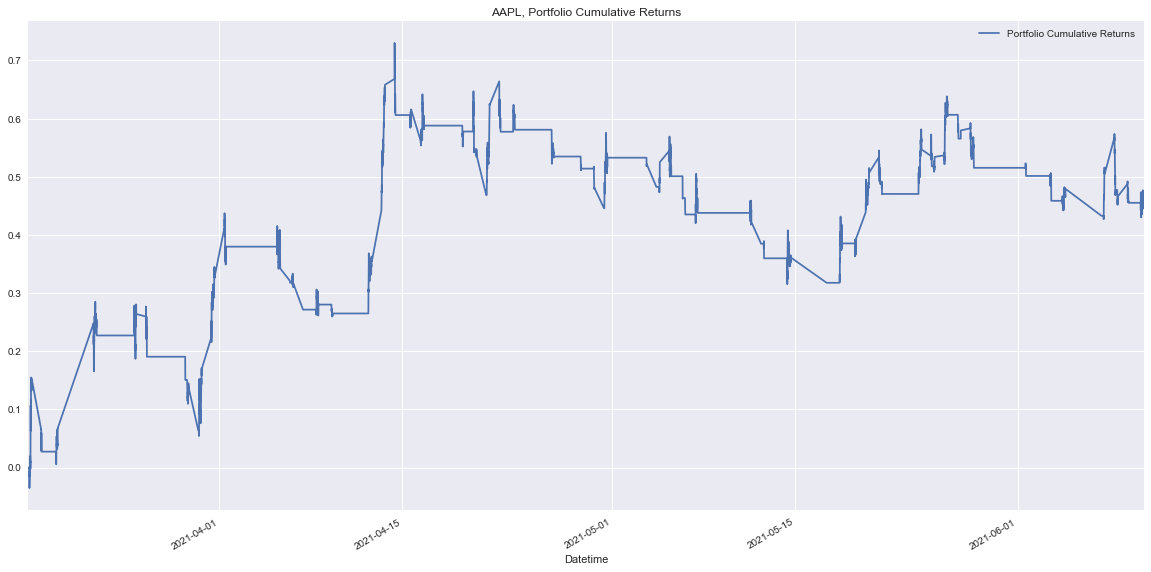

In [28]:
signals_df[['Portfolio Cumulative Returns']].plot(figsize=(20,10), title='AAPL, Portfolio Cumulative Returns');

### Prepare Portfolio Evaluation Metrics DataFrame

In [29]:
# Prepare DataFrame for metrics
metrics = [
    'Annual Return',
    'Cumulative Returns',
    'Annual Volatility',
    'Sharpe Ratio',
    'Sortino Ratio']

columns = ['Backtest']

# Initialize the DataFrame with index set to evaluation metrics and column as `Backtest` (just like PyFolio)
portfolio_evaluation_df = pd.DataFrame(index=metrics, columns=columns)
#portfolio_evaluation_df

### Calculate and Assign Portfolio Evaluation Metrics

In [30]:
# Calculate cumulative return
portfolio_evaluation_df.loc['Cumulative Returns'] = signals_df['Portfolio Cumulative Returns'][-1]


# Calculate annualized return
portfolio_evaluation_df.loc['Annual Return'] = (
    signals_df['Portfolio Daily Returns'].mean() * time_conversion)

# Calculate annual volatility
portfolio_evaluation_df.loc['Annual Volatility'] = (
    signals_df['Portfolio Daily Returns'].std() * np.sqrt(time_conversion))

# Calculate Sharpe Ratio
portfolio_evaluation_df.loc['Sharpe Ratio'] = (
    signals_df['Portfolio Daily Returns'].mean() * time_conversion) / (
    signals_df['Portfolio Daily Returns'].std() * np.sqrt(time_conversion))

# Calculate Downside Return
sortino_ratio_df = signals_df[['Portfolio Daily Returns']].copy()
sortino_ratio_df.loc[:,'Downside Returns'] = 0

target = 0
mask = sortino_ratio_df['Portfolio Daily Returns'] < target
sortino_ratio_df.loc[mask, 'Downside Returns'] = sortino_ratio_df['Portfolio Daily Returns']**2
portfolio_evaluation_df

# Calculate Sortino Ratio
down_stdev = np.sqrt(sortino_ratio_df['Downside Returns'].mean()) * np.sqrt(time_conversion)
expected_return = sortino_ratio_df['Portfolio Daily Returns'].mean() * time_conversion
sortino_ratio = expected_return/down_stdev

# portfolio_evaluation_df.loc['Sortino Ratio_Long'] = 

portfolio_evaluation_df.loc['Sortino Ratio'] = sortino_ratio

portfolio_evaluation_df.head()

Backtest
Annual Return        6.91231
Cumulative Returns  0.445256
Annual Volatility     1.5635
Sharpe Ratio         4.42106
Sortino Ratio        7.20609

In [31]:
portfolio_evaluation_df.reset_index(inplace=True)
portfolio_metrics_evaluation_table = portfolio_evaluation_df.hvplot.table(
    title = f'{stock.upper()}, Strategy Evaluation Metrics (60d/5m)',
    width = 500,
    height = 200)

portfolio_metrics_evaluation_table

:Table   [index,Backtest]

In [32]:
cum_return = signals_df[['Portfolio Cumulative Returns']]
cum_ret_chart = cum_return.hvplot.line(
    ylabel='Cumulative Return',
    line_color= 'orange',
    width=700,
    height=400,
    title=f'{stock.upper()}, Strategy Cumulatine Returns (60d/5m)')

cum_ret_chart

:Curve   [Datetime]   (Portfolio Cumulative Returns)

### Prepare Trade Evaluation Metrics DataFrame

In [33]:
# Initialize trade evaluation DataFrame with columns
trade_evaluation_df = pd.DataFrame(
    columns=[
        'Stock', 
        'Entry Date', 
        'Exit Date', 
        'Shares', 
        'Entry Share Price', 
        'Exit Share Price', 
        'Entry Portfolio Holding', 
        'Exit Portfolio Holding', 
        'Profit/Loss']
)

#trade_evaluation_df.tail(5)

### Generating Trade Evaluation Metrics

In [34]:
# Initialize iterative variables
entry_date = ''
exit_date = ''
entry_portfolio_holding = 0
exit_portfolio_holding = 0
share_size = 0
entry_share_price = 0
exit_share_price = 0

# Loop through signal DataFrame
# If `Signal` is 1, set entry trade metrics
# Else if `Signal` is -1, set exit trade metrics and calculate profit,
# Then append the record to the trade evaluation DataFrame
for index, row in signals_df.iterrows():
    if row['Signal'] == 1:
        entry_date = index
        entry_portfolio_holding = abs(row['Portfolio Holdings'])
        share_size = row['Position']
        entry_share_price = row['Close']

    elif row['Signal'] == -1:
        exit_date = index
        exit_portfolio_holding = abs(row['Close'] * row['Position'])
        exit_share_price = row['Close']
        profit_loss =  entry_portfolio_holding - exit_portfolio_holding
        trade_evaluation_df = trade_evaluation_df.append(
        {
                'Stock':  f'{stock.upper()}',
                'Entry Date': entry_date,
                'Exit Date': exit_date,
                'Shares': share_size,
                'Entry Share Price': entry_share_price,
                'Exit Share Price': exit_share_price,
                'Entry Portfolio Holding': entry_portfolio_holding,
                'Exit Portfolio Holding': exit_portfolio_holding,
                'Profit/Loss': profit_loss
            },
        ignore_index=True)

# Print the DataFrame
trade_evaluation_df.tail(50)

Stock                 Entry Date                  Exit Date  Shares  Entry Share Price  Exit Share Price  Entry Portfolio Holding  Exit Portfolio Holding   Profit/Loss
7   TSLA  2021-04-05 14:05:00-04:00  2021-04-06 09:35:00-04:00   500.0         699.559998        686.090027            349779.998779           343045.013428   6734.985352
8   TSLA  2021-04-06 13:30:00-04:00  2021-04-06 13:55:00-04:00   500.0         687.694580        689.989990            343847.290039           344994.995117  -1147.705078
9   TSLA  2021-04-06 14:00:00-04:00  2021-04-06 14:10:00-04:00   500.0         692.619995        692.390015            346309.997559           346195.007324    114.990234
10  TSLA  2021-04-06 14:20:00-04:00  2021-04-07 09:30:00-04:00   500.0         693.929993        682.594971            346964.996338           341297.485352   5667.510986
11  TSLA  2021-04-08 10:00:00-04:00  2021-04-08 14:10:00-04:00   500.0         681.401123        683.140015            340700.561523           341570.007324   -869.445801
12  TSLA  2021-04-09 13:45:00-04:00  2021-04-09 14:10:00-04:00   500.0         675.049988        673.494995            337524.993896           336747.497559    777.496338
13  TSLA  2021-04-09 14:50:00-04:00  2021-04-09 15:10:00-04:00   500.0         674.330017        672.878113            337165.008545           336439.056396    725.952148
14  TSLA  2021-04-09 15:30:00-04:00  2021-04-09 15:40:00-04:00   500.0         675.940002        674.960022            337970.001221           337480.010986    489.990234
15  TSLA  2021-04-09 15:50:00-04:00  2021-04-09 15:55:00-04:00   500.0         676.090027        677.020020            338045.013428           338510.009766   -464.996338
16  TSLA  2021-04-12 09:30:00-04:00  2021-04-14 11:00:00-04:00   500.0         683.715027        751.944214            341857.513428           375972.106934 -34114.593506
17  TSLA  2021-04-15 14:00:00-04:00  2021-04-16 10:10:00-04:00   500.0         736.900024        731.789978            368450.012207           365894.989014   2555.023193
18  TSLA  2021-04-16 10:50:00-04:00  2021-04-16 11:35:00-04:00   500.0         734.114990        731.150024            367057.495117           365575.012207   1482.482910
19  TSLA  2021-04-16 12:10:00-04:00  2021-04-16 15:45:00-04:00   500.0         734.115784        738.565796            367057.891846           369282.897949  -2225.006104
20  TSLA  2021-04-19 13:45:00-04:00  2021-04-19 15:25:00-04:00   500.0         714.309998        712.280029            357154.998779           356140.014648   1014.984131
21  TSLA  2021-04-20 09:30:00-04:00  2021-04-20 11:30:00-04:00   500.0         722.140015        716.080017            361070.007324           358040.008545   3029.998779
22  TSLA  2021-04-20 15:30:00-04:00  2021-04-21 09:30:00-04:00   500.0         720.780029        704.989990            360390.014648           352494.995117   7895.019531
23  TSLA  2021-04-21 10:35:00-04:00  2021-04-22 11:45:00-04:00   500.0         712.949524        734.713196            356474.761963           367356.597900 -10881.835938
24  TSLA  2021-04-23 10:55:00-04:00  2021-04-23 14:05:00-04:00   500.0         727.500122        728.200378            363750.061035           364100.189209   -350.128174
25  TSLA  2021-04-26 09:30:00-04:00  2021-04-26 13:30:00-04:00   500.0         745.822571        736.377991            372911.285400           368188.995361   4722.290039
26  TSLA  2021-04-26 14:25:00-04:00  2021-04-26 14:30:00-04:00   500.0         736.659973        736.890015            368329.986572           368445.007324   -115.020752
27  TSLA  2021-04-28 14:45:00-04:00  2021-04-28 15:45:00-04:00   500.0         701.335022        697.179626            350667.510986           348589.813232   2077.697754
28  TSLA  2021-04-29 14:50:00-04:00  2021-04-30 09:30:00-04:00   500.0         683.630005        670.000000            341815.002441           335000.000000   6815.002441
29  TSLA  2021-04-30 10:15:00-04:00  2021-04-30 15:45:00-04:00   500.0

In [37]:
trade_evaluation_table = trade_evaluation_df.hvplot.table(
    title = f'{stock.upper()}, Trades (60d/5m)',
    width = 700,
    height = 500)

trade_evaluation_table

:Table   [Stock,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss]

In [38]:
# Assemble dashboard visualization
display(Markdown(f"# {stock.upper()}"))
display(entry_exit_plot)
display(holding_cum_ret_chart + cum_ret_chart)
display(Stock_metrics_evaluation_table + portfolio_metrics_evaluation_table)
display(trade_evaluation_table)

# TSLA

:Overlay
   .Curve.I          :Curve   [Datetime]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Datetime]   (value)
   .Scatter.Close.I  :Scatter   [Datetime]   (Close)
   .Scatter.Close.II :Scatter   [Datetime]   (Close)

:Layout
   .Curve.I  :Curve   [Datetime]   (Stock_Cum_Return)
   .Curve.II :Curve   [Datetime]   (Portfolio Cumulative Returns)

:Layout
   .Table.I  :Table   [index,Backtest]
   .Table.II :Table   [index,Backtest]

:Table   [Stock,Entry Date,Exit Date,Shares,Entry Share Price,Exit Share Price,Entry Portfolio Holding,Exit Portfolio Holding,Profit/Loss]